In [1]:
from fastai.vision.all import *
import matplotlib.pyplot as plt


In [2]:
flower_path = '/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192'
TRAIN_DIR  = flower_path + '/train'
VAL_DIR  = flower_path + '/val'
TEST_DIR  = flower_path + '/test/'

In [3]:
get_image_files(TRAIN_DIR)

(#12753) [Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/3778.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/10746.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/1478.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/5037.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/9677.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/4153.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/8441.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/9146.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/2367.jpeg'),Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/train/garden phlox/8549.jpeg')...]

In [4]:
item_tfms = Resize(192)
batch_tfms = [RandomResizedCrop(224), *aug_transforms(mult=1.0, do_flip=True, max_rotate=30.0, max_zoom=1.5, max_lighting=.8, max_warp=0.3, p_lighting=.9)]

In [5]:
dls = ImageDataLoaders.from_folder(flower_path, valid='val')

In [6]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.406209,1.248781,0.322198,01:02


epoch,train_loss,valid_loss,error_rate,time
0,1.057631,0.727131,0.191002,01:00


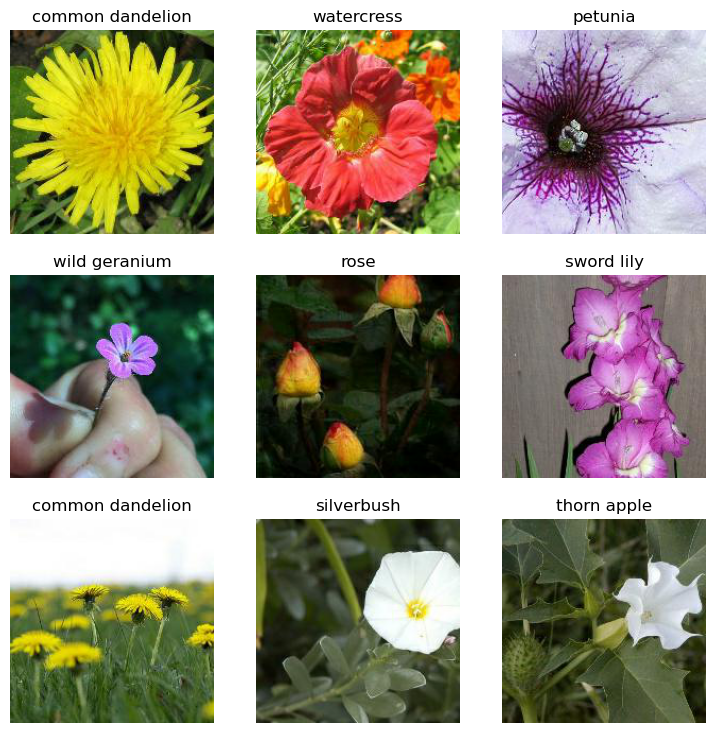

In [7]:
dls.show_batch(max_n=9)

In [8]:
test = TEST_DIR
#for i in get_image_files(test):
#    print(learn.predict(i)[0])
learn.predict(get_image_files(test)[0])
get_image_files(test)[0]

Path('/kaggle/input/104-flowers-garden-of-eden/jpeg-192x192/test/1461713ad.jpeg')